In [8]:
from utils.node2vec import Graph

In [23]:
import networkx as nx
with open(r"raw_data\kegg\train2id.txt") as fp:
    content = fp.readlines()
    count = content[0]
    edge_list_relation = content[1:]

G = nx.read_edgelist(edge_list_relation, nodetype=int, data=(('weight',float),), create_using=nx.DiGraph())



In [24]:
for u, v, data in G.edges(data=True):
    if 'weight' in data:
        data['title'] = f'{int(data["weight"])}'
        data['weight'] = 1

In [25]:
list(G.edges(data=True))[:4]

[(0, 1, {'weight': 1, 'title': '0'}),
 (2, 1, {'weight': 1, 'title': '0'}),
 (3, 1, {'weight': 1, 'title': '0'}),
 (4, 5, {'weight': 1, 'title': '0'})]

In [26]:
# get a list of nodes with zero neighbors
isolates = list(nx.isolates(G))
print(len(isolates))
# remove nodes with zero neighbors from the graph
G.remove_nodes_from(isolates)

0


In [30]:
custom_graph = Graph(G, p=0.2, q=0.3, is_directed=True, weighted=True)

In [31]:
custom_graph.preprocess_transition_probs()
walks = custom_graph.simulate_walks(1, 16)
	

Walk iteration:
1 / 1


In [32]:
walks

[[118181],
 [100468, 10],
 [31125, 10],
 [82416],
 [121828, 10],
 [33262, 33263],
 [100214],
 [57380, 10],
 [46587],
 [6539, 8, 9],
 [16198, 8, 9],
 [1482, 10],
 [30461, 10],
 [92348, 92349],
 [25607],
 [112506, 112507],
 [28879, 96, 9],
 [75326],
 [18310],
 [122829],
 [100544],
 [73818, 77, 9],
 [1110, 74, 9],
 [79196],
 [127493, 10],
 [64753, 10],
 [22837, 10],
 [6160],
 [75591, 10],
 [32714, 449, 10],
 [99807],
 [103563, 10],
 [80778],
 [125297, 9674, 9682, 10],
 [58254, 58256, 54, 9],
 [79880, 10],
 [1901, 1902],
 [74575, 74577, 74578],
 [163, 17, 9],
 [58058],
 [8726, 54, 9],
 [87464, 87465],
 [64214, 62, 9],
 [119421],
 [109012, 74, 9],
 [100722, 10],
 [69487, 74, 9],
 [122276],
 [110676],
 [28787, 28788],
 [112838, 10],
 [103926],
 [104440, 1145, 12],
 [15102, 77, 9],
 [83830, 8, 9],
 [81119, 8, 9],
 [3243, 10],
 [126409],
 [109873, 10],
 [53992, 10],
 [14210],
 [106727, 10],
 [46412, 10],
 [14],
 [81649],
 [21695],
 [54501],
 [4299, 10],
 [88266],
 [64230],
 [19099, 10],
 [5379

In [53]:
! pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10

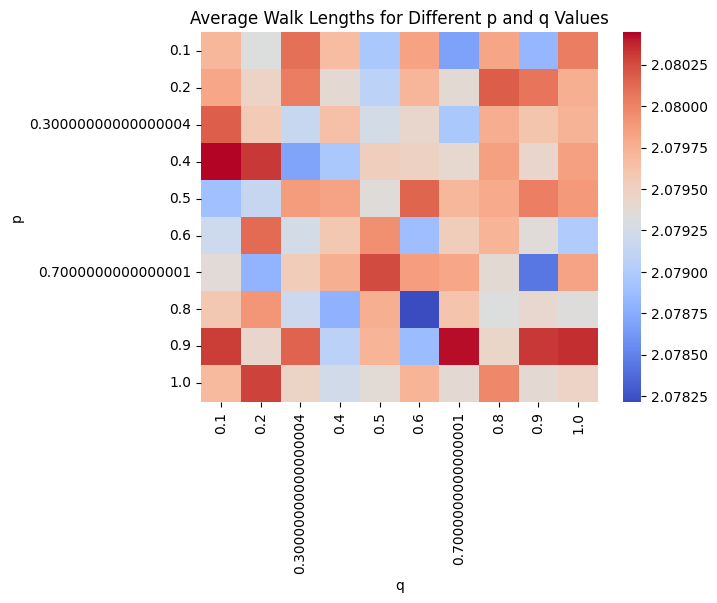

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a range of p and q values to test
p_values = np.linspace(0.1, 1.0, 10)
q_values = np.linspace(0.1, 1.0, 10)

# Create an empty matrix to store the average walk lengths
avg_lengths = np.zeros((len(p_values), len(q_values)))

# Iterate over all combinations of p and q values
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        # Create the custom graph
        custom_graph = Graph(G, p=p, q=q, is_directed=True, weighted=True)
        custom_graph.preprocess_transition_probs()
        
        # Generate random walks and calculate their average length
        walks = custom_graph.simulate_walks(10, 16)
        lengths = [len(walk) for walk in walks]
        avg_lengths[i, j] = np.mean(lengths)

# Create a heatmap of the average walk lengths
sns.heatmap(avg_lengths, cmap='coolwarm', xticklabels=q_values, yticklabels=p_values)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Average Walk Lengths for Different p and q Values')
plt.show()


In [42]:
G.number_of_nodes()

129910

In [43]:
len(walks)

129910

In [52]:
walks

[[32725],
 [122075],
 [95901],
 [108804],
 [56078],
 [33051, 65, 9],
 [120733, 8, 9],
 [117628, 117629],
 [92916, 92917],
 [59219],
 [119821, 8, 9],
 [35393],
 [89132, 77, 9],
 [57473, 10],
 [81163, 81164],
 [48827],
 [4827, 84, 9],
 [21350, 58, 9],
 [126845, 10],
 [108697, 54, 9],
 [101583],
 [33274, 33275],
 [115392],
 [28078],
 [3170, 3172, 17, 9],
 [110754],
 [73234, 74, 9],
 [122507],
 [24109, 96, 9],
 [118381],
 [117189],
 [78723, 8, 9],
 [122333, 122342, 58, 9],
 [95124, 69, 9],
 [89784, 8, 9],
 [10161, 10],
 [113933, 65, 9],
 [98162, 32240, 32241],
 [81397, 10],
 [123591, 58, 9],
 [125552],
 [82945],
 [79516, 10],
 [46768, 46769],
 [120773, 54, 9],
 [104397, 58, 9],
 [66712, 77, 9],
 [98842],
 [50644],
 [7207, 7208],
 [99145, 10],
 [36229, 74, 9],
 [113356, 113357],
 [88307],
 [118494, 6359, 10],
 [119412, 58, 9],
 [126260, 126261],
 [105676],
 [44722],
 [48543],
 [63179],
 [62415, 10],
 [104609],
 [44080],
 [71506, 71507],
 [63371, 10],
 [115986, 10],
 [103404, 58, 9],
 [12097

In [28]:
i = 0 
for _ in G.edges(data=True):
    if i >100:
        break
    print(_)
    i+=1

AttributeError: 'Graph' object has no attribute 'edges'

In [1]:
import networkx as nx
import pandas as pd


In [33]:
file_path = 'raw_data/kegg/train2id.txt'

In [37]:
weighted_edges = []
with open(file_path, encoding='utf8') as reader:
        count = 0
        for line in reader:
            if count == 0:
                count += 1
                continue
            head, tail, relation = line.strip().split(' ')
            weighted_edges.append((head, tail, relation))

In [38]:
pdd_graph = nx.Graph()
pdd_graph.add_weighted_edges_from(weighted_edges)

In [39]:
pdd_graph.name = 'PDD Dataset'
# Obtain general information of graph
print(nx.info(pdd_graph))

# Get graph density
density = nx.density(pdd_graph)
print("Network density:", density)

Graph named 'PDD Dataset' with 129910 nodes and 362846 edges
Network density: 4.300020370541539e-05


C:\Users\mayan\AppData\Local\Temp\ipykernel_23288\2583617677.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(pdd_graph))


By calculating the degree centrality of each node, we can get the top 20 drugs most frequently involved in drug interactions:



In [28]:
from operator import itemgetter

# Create dictionary to store degrees of nodes
degree_dict = dict(pdd_graph.degree(pdd_graph.nodes()))
nx.set_node_attributes(pdd_graph, 
                       degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 drugs by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 drugs by degree:
('3', 58930)
('1', 46481)
('2', 1217)
('26', 2)
('39', 2)
('62', 2)
('74', 2)
('99', 2)
('102', 2)
('114', 2)
('122', 2)
('124', 2)
('132', 2)
('142', 2)
('151', 2)
('155', 2)
('156', 2)
('161', 2)
('163', 2)
('166', 2)


In [8]:
# ! pip install datapane

^C


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pyvis.network import Network
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately
import datapane as dp

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\mayan\AppData\Local\Temp\ipykernel_23288\3503969599.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [12]:
# # Get all degree values
# sorted_degree_values = [pair[1] for pair in sorted_degree]

# # Set fixed bin size
# bins = np.arange(0, 450, 2) # fixed bin size

# # Plot histogram
# plt.xlim([min(sorted_degree_values)-15, max(sorted_degree_values)+15])
# plt.hist(sorted_degree_values, bins=bins, alpha=0.5)
# plt.title('Node degree distribution (fixed bin size)')
# plt.xlabel('degree')
# plt.ylabel('count')
# plt.show()

In [14]:
# Get degree centrality (corresponds with degree)
degree_centrality = nx.degree_centrality(pdd_graph)
degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
degree_centrality

{'3': 0.9797336614075046,
 '1': 0.7727643019834078,
 '2': 0.020233087831884152,
 '26': 3.325076061114898e-05,
 '39': 3.325076061114898e-05,
 '62': 3.325076061114898e-05,
 '74': 3.325076061114898e-05,
 '99': 3.325076061114898e-05,
 '102': 3.325076061114898e-05,
 '114': 3.325076061114898e-05,
 '122': 3.325076061114898e-05,
 '124': 3.325076061114898e-05,
 '132': 3.325076061114898e-05,
 '142': 3.325076061114898e-05,
 '151': 3.325076061114898e-05,
 '155': 3.325076061114898e-05,
 '156': 3.325076061114898e-05,
 '161': 3.325076061114898e-05,
 '163': 3.325076061114898e-05,
 '166': 3.325076061114898e-05,
 '176': 3.325076061114898e-05,
 '177': 3.325076061114898e-05,
 '188': 3.325076061114898e-05,
 '192': 3.325076061114898e-05,
 '198': 3.325076061114898e-05,
 '199': 3.325076061114898e-05,
 '203': 3.325076061114898e-05,
 '207': 3.325076061114898e-05,
 '209': 3.325076061114898e-05,
 '212': 3.325076061114898e-05,
 '219': 3.325076061114898e-05,
 '222': 3.325076061114898e-05,
 '224': 3.325076061114898e